In [1]:
!unzip '/content/drive/MyDrive/Projects/Supervised/archive (2).zip' -d '/content/drive/MyDrive/Projects/180_projects'

unzip:  cannot find or open /content/drive/MyDrive/Projects/Supervised/archive (2).zip, /content/drive/MyDrive/Projects/Supervised/archive (2).zip.zip or /content/drive/MyDrive/Projects/Supervised/archive (2).zip.ZIP.


## Task

1. Visualize the water need / usage of the city
2. Identify whether the water sources availability will be able to meet the  needs till the subsequent monsoon?
3. How bad is the current water crisis compared to previous years?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
level = pd.read_csv('/content/drive/MyDrive/Projects/180_projects/chennai_reservoir_levels.csv',parse_dates = ['Date'], dayfirst=True)

In [4]:
level.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [5]:
level.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
6177,2020-11-29,2814.0,403.0,2819.0,3120.0
6178,2020-11-30,2848.0,465.0,2833.0,3120.0
6179,2020-12-01,2902.0,504.0,2841.0,3123.0
6180,2020-12-02,2873.0,547.0,2847.0,3125.0
6181,2020-12-03,2867.0,590.0,2878.0,3137.0


**1. Visualize the water need / usage of the city**

Here we'll plot the graph of the water used by the city on a day. We've used line graph to visualize the dataset.

Here we used the plot function as our x axis is Date as from the day dam built to today and y axis defines the capacity of the tank(in mcft).

### Fun facts
 
* The height of poondi dam : 140 ft
* The height of cholavaram : 65 ft
* The height of redhills : 50 ft
* The height of chembakkam : 85 ft


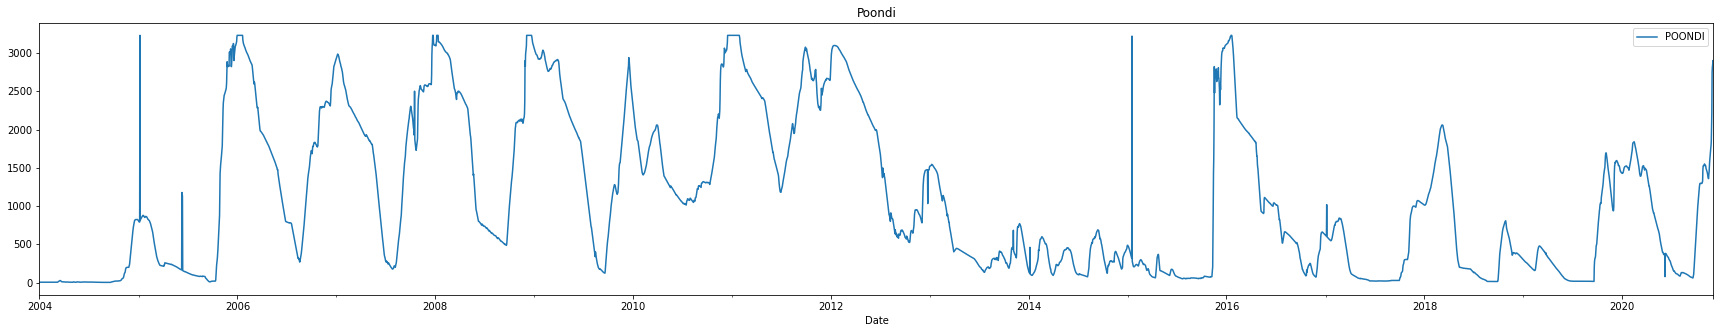

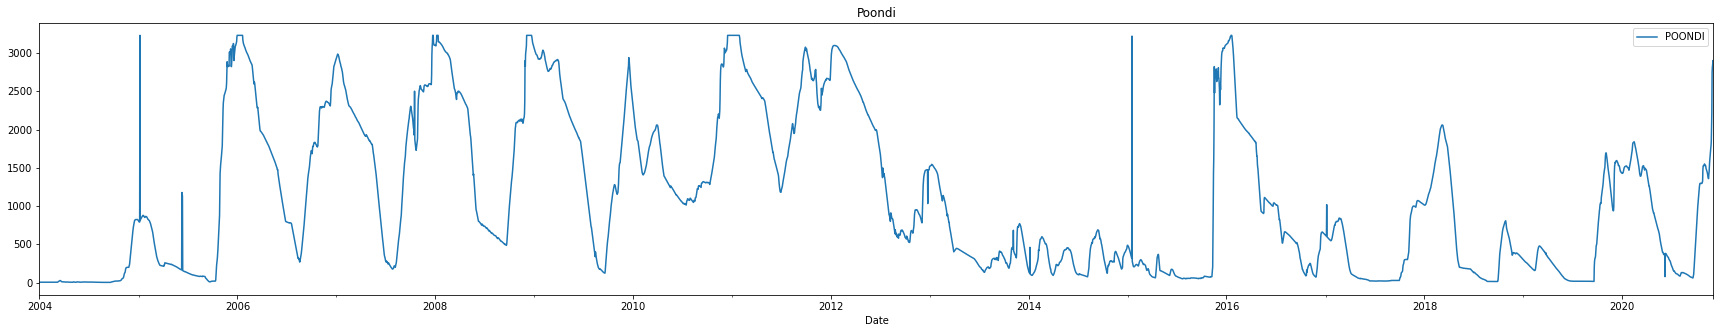

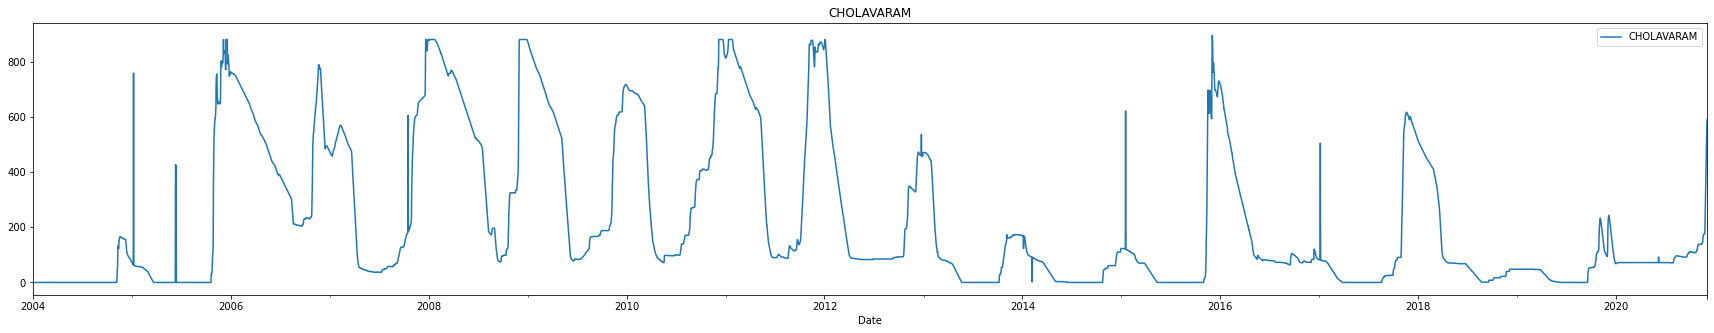

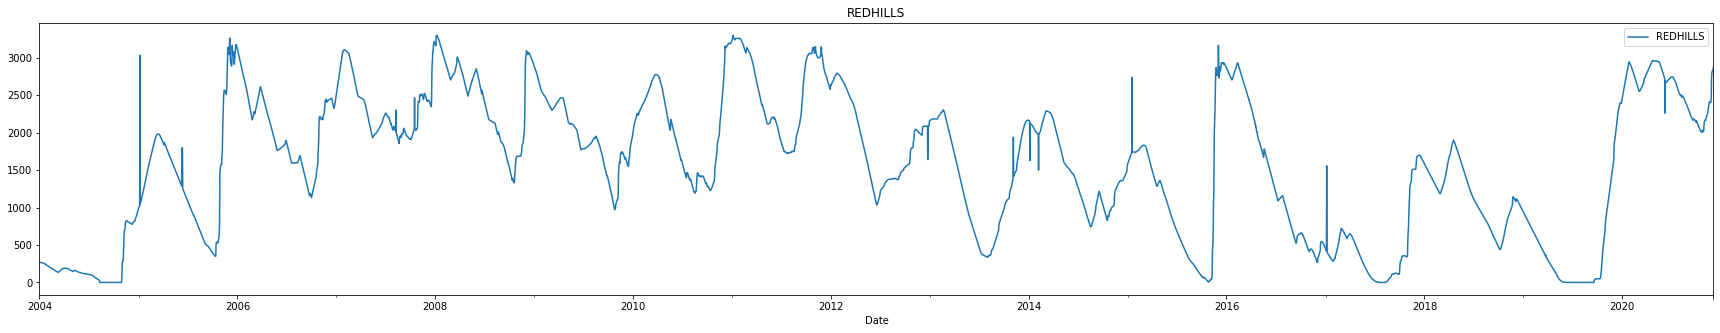

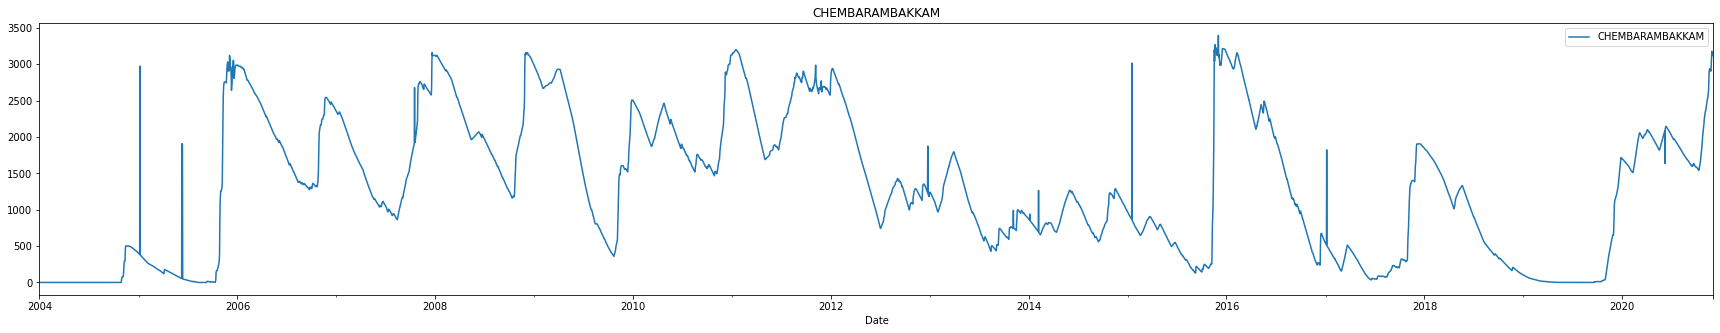

In [6]:
ax = level.plot(kind='line',x='Date',y ='POONDI',figsize = (30,5),title='Poondi')
ax = level.plot(kind='line',x='Date',y ='POONDI',figsize = (30,5),title='Poondi')
ax = level.plot(kind='line',x='Date',y ='CHOLAVARAM',figsize = (30,5),title='CHOLAVARAM')
ax = level.plot(kind='line',x='Date',y ='REDHILLS',figsize = (30,5),title='REDHILLS')
ax = level.plot(kind='line',x='Date',y ='CHEMBARAMBAKKAM',figsize = (30,5),title='CHEMBARAMBAKKAM')

**Identify whether the water sources availability will be able to meet the needs till the subsequent monsoon?**

After going through the graph we can easily make prediction that 

## Compare the water level over time



In [7]:
## Compare the water level at 

level.Date.dt.year.min() , level.Date.dt.year.max()

(2004, 2020)

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [9]:
fig = make_subplots(rows=2,cols=2)
fig.add_trace(go.Scatter(x=level['Date'],y=level['POONDI'],mode="lines"),row=1,col=1)
fig.add_trace(go.Scatter(x=level['Date'],y=level['REDHILLS'],mode="lines"),row=1,col=2)
fig.add_trace(go.Scatter(x=level['Date'],y=level['CHOLAVARAM'],mode="lines"),row=2,col=1)
fig.add_trace(go.Scatter(x=level['Date'],y=level['CHEMBARAMBAKKAM'],mode="lines"),row=2,col=2)
fig.update_layout(title_text='Water Managment {}-{}'.format(level.Date.dt.year.min(),level.Date.dt.year.max()))
fig.show()

## Look at the overall water level

In [10]:
level['Total'] = level.drop(columns='Date').sum(axis=1)

In [11]:
px.line(level,x='Date',y='Total', title = 'Total water availabiblity in chennai')

## Rainfall level

In this we'll visualize the daily , monthly rainfall.

In [12]:
rain = pd.read_csv('/content/drive/MyDrive/Projects/180_projects/chennai_reservoir_rainfall.csv',parse_dates=['Date'],dayfirst=True)

In [13]:
rain

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
6177,2020-11-29,0.0,0.0,0.0,0.0
6178,2020-11-30,4.0,13.0,6.0,0.0
6179,2020-12-01,0.0,0.0,0.0,0.0
6180,2020-12-02,0.0,0.0,0.0,0.0


In [14]:
import plotly.graph_objects as go 
import plotly.subplots as make_subplots
import plotly.express as px


In [15]:
px.line(rain.melt(id_vars=['Date'], var_name='Resoviour',value_name='Rainfall'),
        x="Date",
        y='Rainfall',
        facet_col='Resoviour',
        facet_col_wrap=2,
        color='Resoviour',
        )

In [16]:
rain['Month'] = pd.to_datetime(rain.Date.dt.year.astype(str) + rain.Date.dt.month.astype(str), format='%Y%m')
rain.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Month
0,2004-01-01,0.0,0.0,0.0,0.0,2004-01-01
1,2004-01-02,0.0,0.0,0.0,0.0,2004-01-01
2,2004-01-03,0.0,0.0,0.0,0.0,2004-01-01
3,2004-01-04,0.0,0.0,0.0,0.0,2004-01-01
4,2004-01-05,0.0,0.0,0.0,0.0,2004-01-01


In [17]:
rain['Total'] = rain.drop(columns=['Date','Month']).sum(axis=1)
rain

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Month,Total
0,2004-01-01,0.0,0.0,0.0,0.0,2004-01-01,0.0
1,2004-01-02,0.0,0.0,0.0,0.0,2004-01-01,0.0
2,2004-01-03,0.0,0.0,0.0,0.0,2004-01-01,0.0
3,2004-01-04,0.0,0.0,0.0,0.0,2004-01-01,0.0
4,2004-01-05,0.0,0.0,0.0,0.0,2004-01-01,0.0
...,...,...,...,...,...,...,...
6177,2020-11-29,0.0,0.0,0.0,0.0,2020-11-01,0.0
6178,2020-11-30,4.0,13.0,6.0,0.0,2020-11-01,23.0
6179,2020-12-01,0.0,0.0,0.0,0.0,2020-12-01,0.0
6180,2020-12-02,0.0,0.0,0.0,0.0,2020-12-01,0.0


In [18]:
px.bar(rain.groupby('Month').Total.sum().reset_index(),
       x='Month',
       y='Total',
       title='Monthly rainfall in Chennai')

In [19]:
month_to_season = {1:'winter', 2:'winter',3:'summner',4:'summer',5:'summer',6:'monsoon',7:'monsoon',8:'monsoon',9:'monsoon',10:'post-monsoon',11:'post-monsoon',12:'post-monsoon'}

In [20]:
month_rain = rain.groupby('Month').Total.sum().reset_index()
month_rain

,Month,Total
0,2004-01-01,111.0
1,2004-02-01,0.0
2,2004-03-01,0.0
3,2004-04-01,26.0
4,2004-05-01,906.0
...,...,...
199,2020-08-01,447.0
200,2020-09-01,762.4
201,2020-10-01,784.4
202,2020-11-01,1543.0


In [21]:
month_rain['Season'] = month_rain.Month.dt.month.map(month_to_season)

In [22]:
month_rain

,Month,Total,Season
0,2004-01-01,111.0,winter
1,2004-02-01,0.0,winter
2,2004-03-01,0.0,summner
3,2004-04-01,26.0,summer
4,2004-05-01,906.0,summer
...,...,...,...
199,2020-08-01,447.0,monsoon
200,2020-09-01,762.4,monsoon
201,2020-10-01,784.4,post-monsoon
202,2020-11-01,1543.0,post-monsoon


In [23]:
px.bar(month_rain,
       x='Month',
       y='Total',
       color='Season',
       title='Monthly rainfall in Chennai by season')

## 3. Total yearly rainfall


In [25]:
rain['Year'] = pd.to_datetime(rain
                              .Date.dt.year.astype(str), format='%Y')

In [26]:
rain

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Month,Total,Year
0,2004-01-01,0.0,0.0,0.0,0.0,2004-01-01,0.0,2004-01-01
1,2004-01-02,0.0,0.0,0.0,0.0,2004-01-01,0.0,2004-01-01
2,2004-01-03,0.0,0.0,0.0,0.0,2004-01-01,0.0,2004-01-01
3,2004-01-04,0.0,0.0,0.0,0.0,2004-01-01,0.0,2004-01-01
4,2004-01-05,0.0,0.0,0.0,0.0,2004-01-01,0.0,2004-01-01
...,...,...,...,...,...,...,...,...
6177,2020-11-29,0.0,0.0,0.0,0.0,2020-11-01,0.0,2020-01-01
6178,2020-11-30,4.0,13.0,6.0,0.0,2020-11-01,23.0,2020-01-01
6179,2020-12-01,0.0,0.0,0.0,0.0,2020-12-01,0.0,2020-01-01
6180,2020-12-02,0.0,0.0,0.0,0.0,2020-12-01,0.0,2020-01-01


In [27]:
px.bar(rain.groupby('Year').Total.sum().reset_index(),
       x='Year',
       y='Total',
       title='Year rainfall in Chennai')

## Water Shortage in summer

In [97]:
px.bar(rain.query(" Date.dt.month==6 and Date.dt.day==1"),
       x='Date',
       y='Total',
       color='Total',
       title='Water shortage in Summer')

In [70]:
pd.set_option('display.max_rows', 10)